In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


The dataset D stored in the file at this link reports the activity of one LTE cell during approximately 1 month of operation.

The dataset contains the following information:

- *overalltime*: in seconds, starting from the initial date of the measurements (29/06/2016)
- *overallusers*: number of transmitting users
- *overallrbdw*: total number of resource blocks in downlink
- *overallrbdwmean*: mean number of resource blocks in downlink
- *overallrbdwstd*: standard deviation of resource blocks in downlink
- *overallratedw*: rate (bit/s) in downlink
- *overallratedwmean*: mean rate (bit/s) in downlink
- *overallratedwstd*: standard deviation of rate in downlink
- *overallmsgdw*: number of messages in downlink
- *overallretxdw*: number of retransmitted packets in downlink
- *overallrbup*: total number of resource blocks in uplink
- *overallrbupmean*: mean number of resource blocks in uplink
- *overallrbupstd*: standard deviation of resource blocks in uplink
- *overallrateup*: rate (bit/s) in uplink
- *overallrateupmean*: mean rate (bit/s) in uplink
- *overallrateupstd*: standard deviation rate (bit/s) in downlink
- *overallmsgup*: number of messages in uplink
- *overallretxup*: number of retransmitted packets in uplink

In [2]:
df = pd.read_csv("data/rastro.tar.gz").rename(columns={"rastro.csv":"overalltime"})
df.head()

,overalltime,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
0,82561,9,319,12.269231,11.622591,39608,1523.384615,3244.587901,26,0,1478,6.627803,8.242416,245424.0,1100.556054,2047.784524,191.0,32.0
1,82562,9,603,11.377358,11.724771,34440,649.811321,1168.622217,50,3,1169,5.488263,5.772912,140032.0,657.427230,673.679666,165.0,48.0
2,82563,9,545,12.976190,14.322910,60688,1444.952381,3106.136530,41,1,814,3.786047,6.354099,163304.0,759.553488,1388.000197,157.0,58.0
3,82564,10,725,10.661765,11.306596,55736,819.647059,1822.320480,68,0,1236,3.340541,3.289588,246064.0,665.037838,516.984506,316.0,54.0
4,82565,11,15402,40.638522,16.144476,4405688,11624.506596,8239.047939,332,47,2825,6.907090,8.484483,333720.0,815.941320,868.953391,368.0,41.0


In [3]:
df = df.set_index(
    pd.to_datetime(df["overalltime"], origin=pd.Timestamp("29/06/2016 00:00:00"), unit="s")
).drop(columns=["overalltime"])
df.head()

,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
overalltime,,,,,,,,,,,,,,,,,
2016-06-29 22:56:01,9,319,12.269231,11.622591,39608,1523.384615,3244.587901,26,0,1478,6.627803,8.242416,245424.0,1100.556054,2047.784524,191.0,32.0
2016-06-29 22:56:02,9,603,11.377358,11.724771,34440,649.811321,1168.622217,50,3,1169,5.488263,5.772912,140032.0,657.427230,673.679666,165.0,48.0
2016-06-29 22:56:03,9,545,12.976190,14.322910,60688,1444.952381,3106.136530,41,1,814,3.786047,6.354099,163304.0,759.553488,1388.000197,157.0,58.0
2016-06-29 22:56:04,10,725,10.661765,11.306596,55736,819.647059,1822.320480,68,0,1236,3.340541,3.289588,246064.0,665.037838,516.984506,316.0,54.0
2016-06-29 22:56:05,11,15402,40.638522,16.144476,4405688,11624.506596,8239.047939,332,47,2825,6.907090,8.484483,333720.0,815.941320,868.953391,368.0,41.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overallusers,2389749.0,4.757134,3.205597e+00,0.0,2.000000,4.000000,6.000000,3.200000e+01
overallrbdw,2389749.0,1045.937955,3.845251e+03,0.0,9.000000,114.000000,486.000000,4.803300e+04
overallrbdwmean,2131143.0,13.695163,1.110065e+01,0.0,6.000000,10.444444,18.000000,5.100000e+01
overallrbdwstd,2131143.0,9.902240,7.060188e+00,0.0,3.105295,10.387746,16.183159,3.323402e+01
overallratedw,2389749.0,258785.066867,1.142466e+06,0.0,416.000000,5240.000000,49672.000000,4.767835e+07
overallratedwmean,2131143.0,2264.550276,4.117831e+03,0.0,236.000000,496.888889,2114.285714,6.957288e+04
overallratedwstd,2131143.0,2423.768521,3.514114e+03,0.0,167.857082,576.999133,3815.110517,3.871551e+04
overallmsgdw,2389749.0,35.177170,8.476111e+01,0.0,2.000000,11.000000,32.000000,1.956000e+03
overallretxdw,2389749.0,1.907851,7.976470e+00,0.0,0.000000,0.000000,0.000000,5.370000e+02
overallrbup,2389749.0,793.511378,1.664328e+03,0.0,111.000000,363.000000,968.000000,4.135400e+04


In [5]:
df.isna().sum(axis=0)

overallusers              0
overallrbdw               0
overallrbdwmean      258606
overallrbdwstd       258606
overallratedw             0
overallratedwmean    258606
overallratedwstd     258606
overallmsgdw              0
overallretxdw             0
overallrbup               0
overallrbupmean       13045
overallrbupstd        13045
overallrateup             2
overallrateupmean     13047
overallrateupstd      13047
overallmsgup              1
overallretxup             1
dtype: int64

In [6]:
market = pd.date_range(start="2016/07/03 09:00:00", end="2016/08/01 00:00:00", freq="1w").tolist() + \
    pd.date_range(start="2016/07/03 16:00:00", end="2016/08/01 00:00:00", freq="1w").tolist()

market[:5]

[Timestamp('2016-07-03 09:00:00', freq='W-SUN'),
 Timestamp('2016-07-10 09:00:00', freq='W-SUN'),
 Timestamp('2016-07-17 09:00:00', freq='W-SUN'),
 Timestamp('2016-07-24 09:00:00', freq='W-SUN'),
 Timestamp('2016-07-03 16:00:00', freq='W-SUN')]

In [7]:
df_nan = df.isna().astype(int)
df_nan = df_nan.resample("1T").sum()

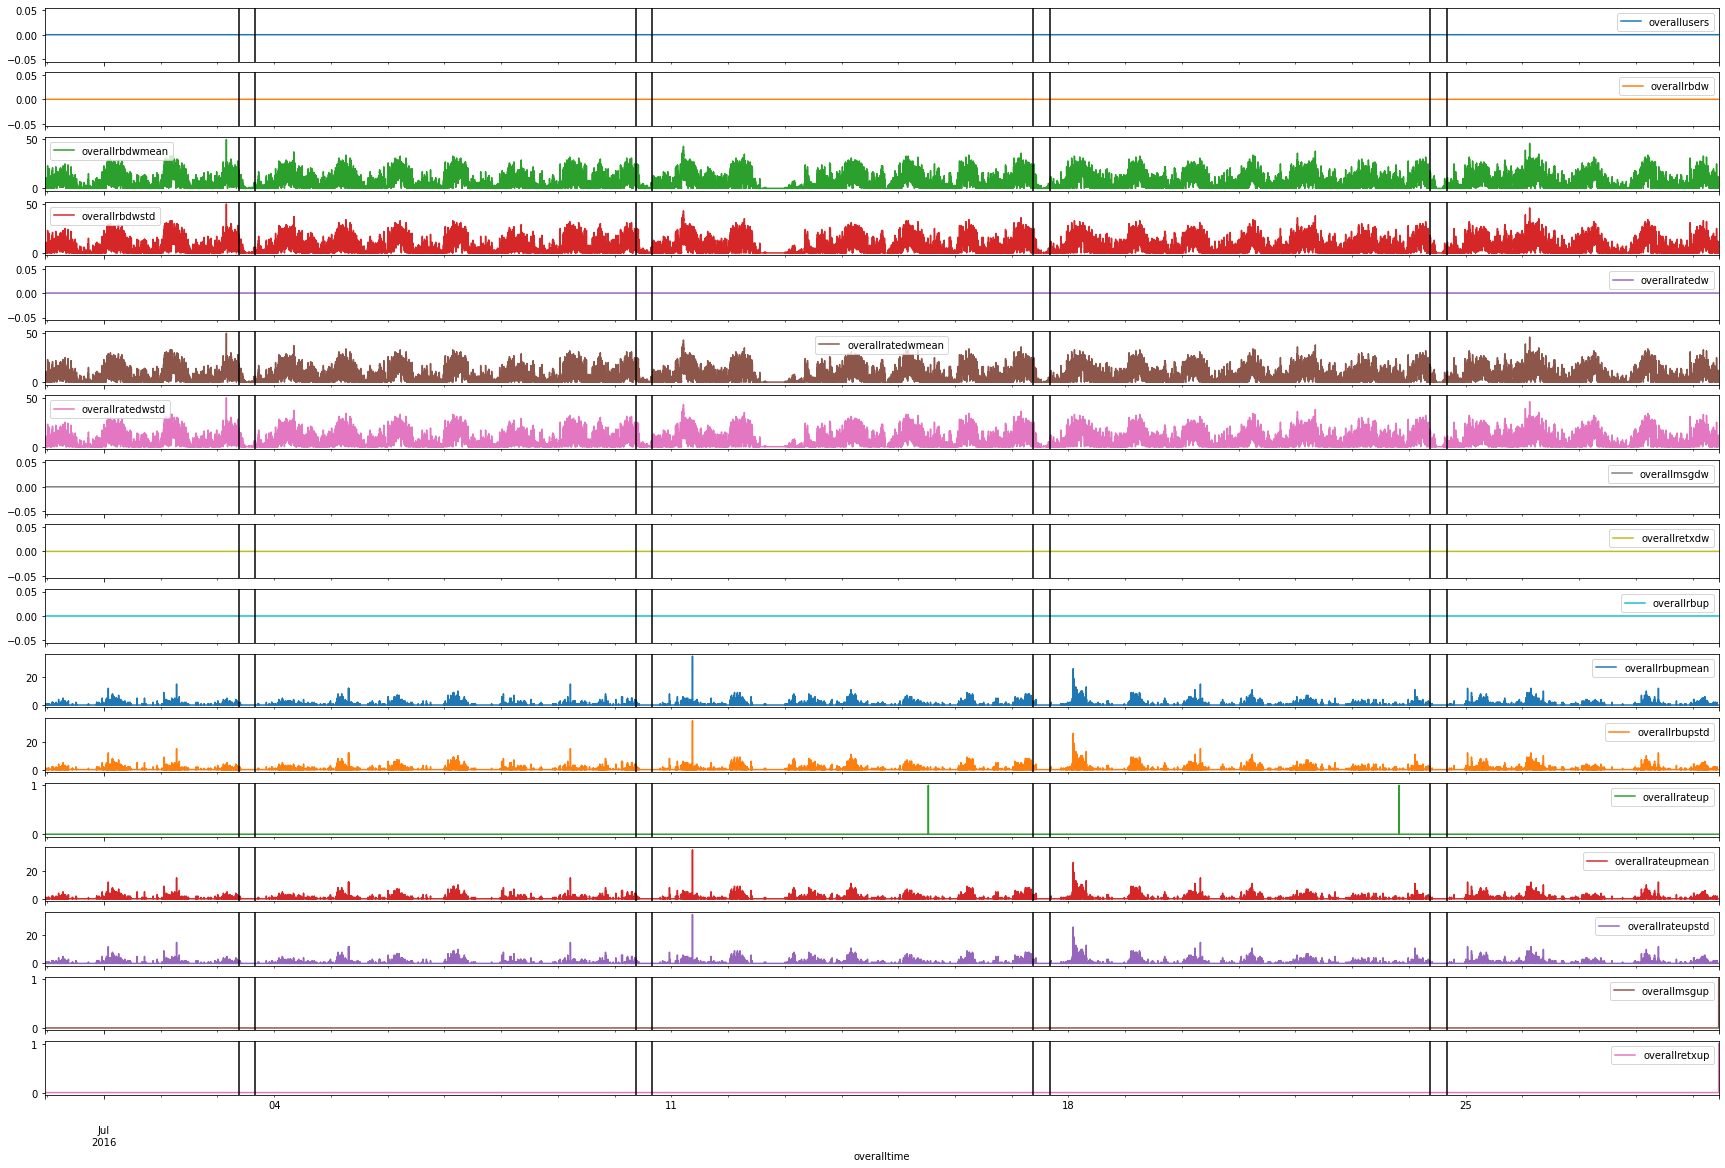

In [8]:
axs = df_nan.plot(subplots=True, sharex=True, figsize=(30,20))
for t in market:
    for ax in axs:
        ax.axvline(t, color="black", ls="-")
plt.show()

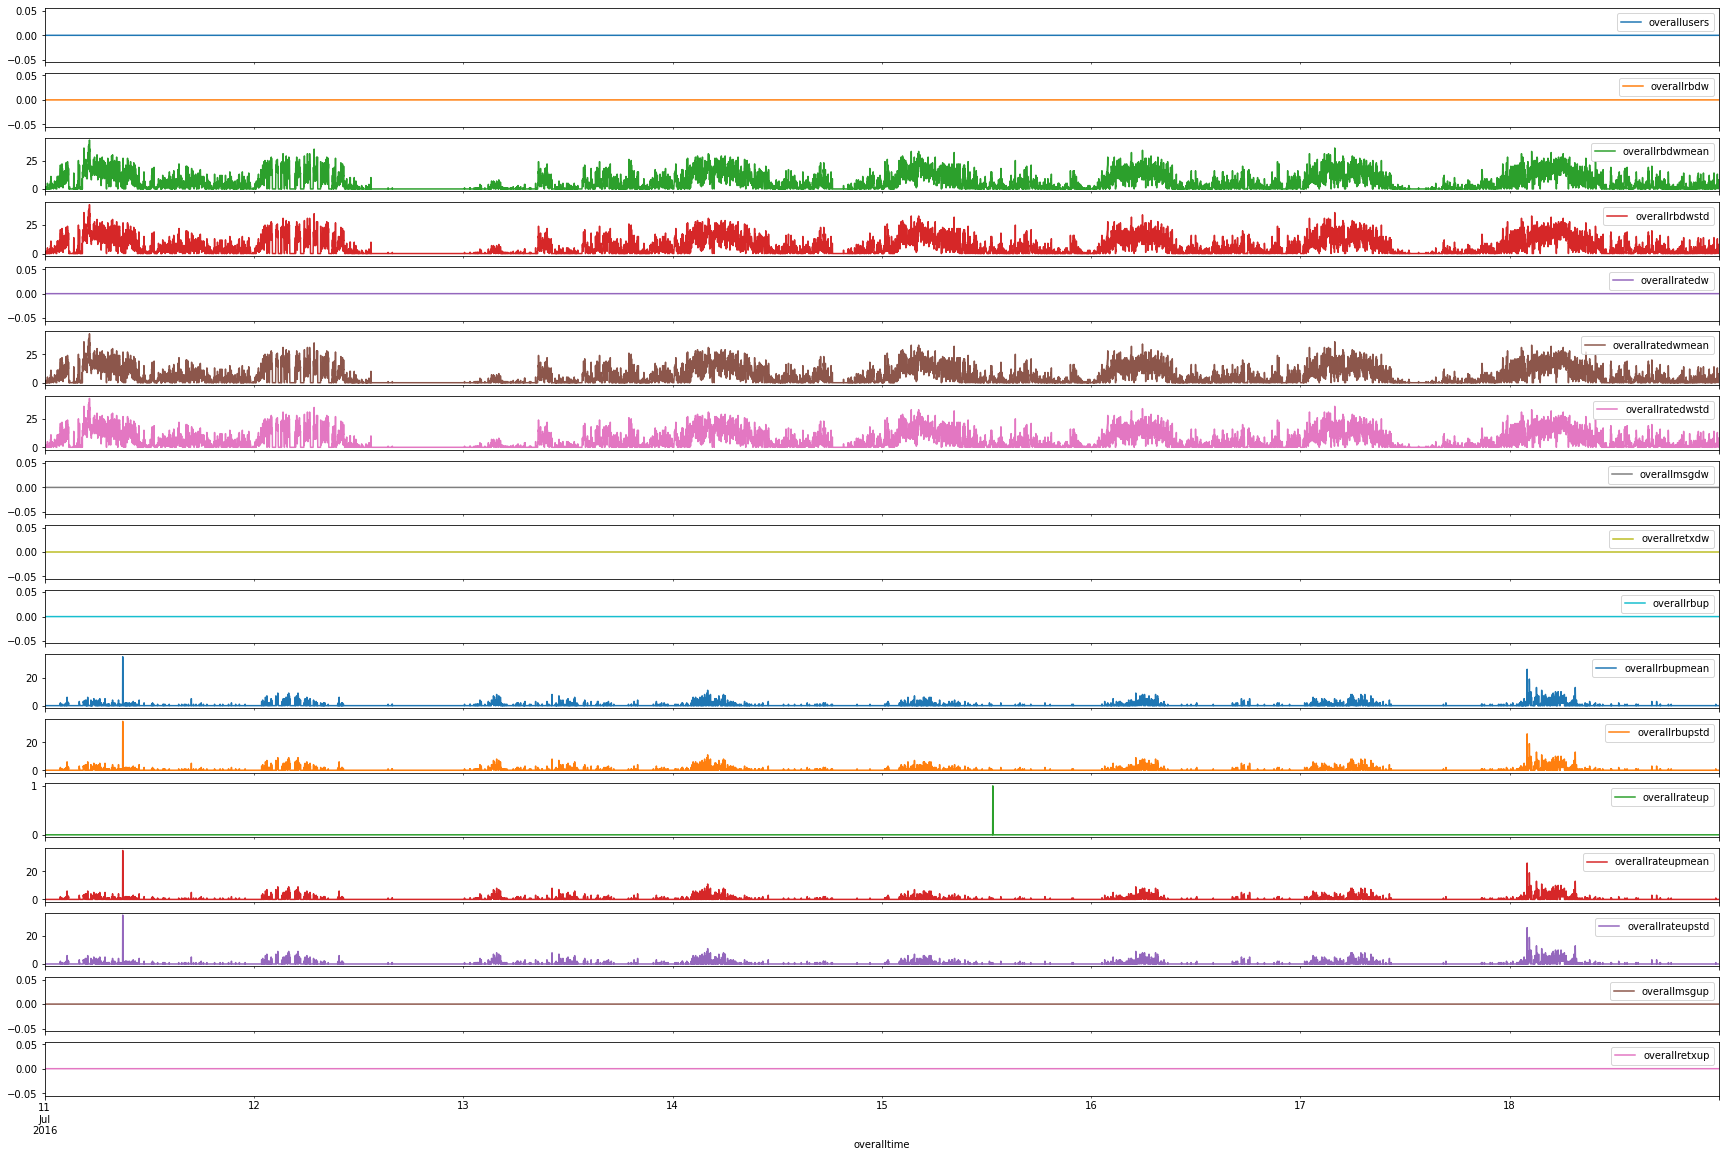

In [9]:
_ = df_nan.loc["2016-07-11":"2016-07-18"].plot(subplots=True, sharex=True, figsize=(30,20))

In [10]:
# resample data to 1 min
df_res = df.resample("1T").mean()

#.agg({
#    "overallusers": np.mean,
#    "overallrbdw": np.mean,
#    "overallrbdwmean": np.mean,
#    "overallrbdwstd": np.mean,
#    "overallratedw": np.sum,
#    "overallratedwmean": np.mean,
#    "overallratedwstd": np.mean,
#    "overallmsgdw": np.sum,
#    "overallretxdw": np.sum,
#    "overallrbup": np.sum,
#    "overallrbupmean": np.mean,
#    "overallrbupstd": np.mean,
#    "overallrateup": np.sum,
#    "overallrateupmean": np.mean,
#    "overallrateupstd": np.mean,
#    "overallmsgup": np.sum,
#    "overallretxup": np.sum
#})
df_res.head()

,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
overalltime,,,,,,,,,,,,,,,,,
2016-06-29 22:56:00,8.711864,1737.949153,19.737289,17.590780,4.610697e+05,3707.610350,4828.865308,60.033898,2.762712,1251.881356,3.443046,4.184972,150221.559322,434.507309,616.176033,180.135593,165.830508
2016-06-29 22:57:00,10.566667,975.183333,16.470517,15.334160,1.172443e+05,2017.145780,2984.791050,52.000000,1.216667,1407.983333,3.385373,3.600891,149476.666667,373.483436,468.323626,241.600000,187.216667
2016-06-29 22:58:00,14.816667,2018.716667,16.866703,14.328054,3.782617e+05,2655.061443,3775.325510,84.233333,2.650000,2899.116667,6.576329,5.829330,239384.266667,544.011478,561.241565,324.700000,111.933333
2016-06-29 22:59:00,11.166667,1754.000000,18.245522,15.004146,3.280561e+05,2672.386192,3300.962021,66.600000,2.950000,2041.966667,6.762097,5.491740,161850.133333,540.194010,469.583361,239.600000,56.200000
2016-06-29 23:00:00,10.661017,11046.406780,27.337623,13.555662,2.865999e+06,5919.297844,4132.723859,245.203390,18.983051,2109.101695,6.628143,6.706426,195703.457627,596.334224,698.955721,235.627119,78.542373


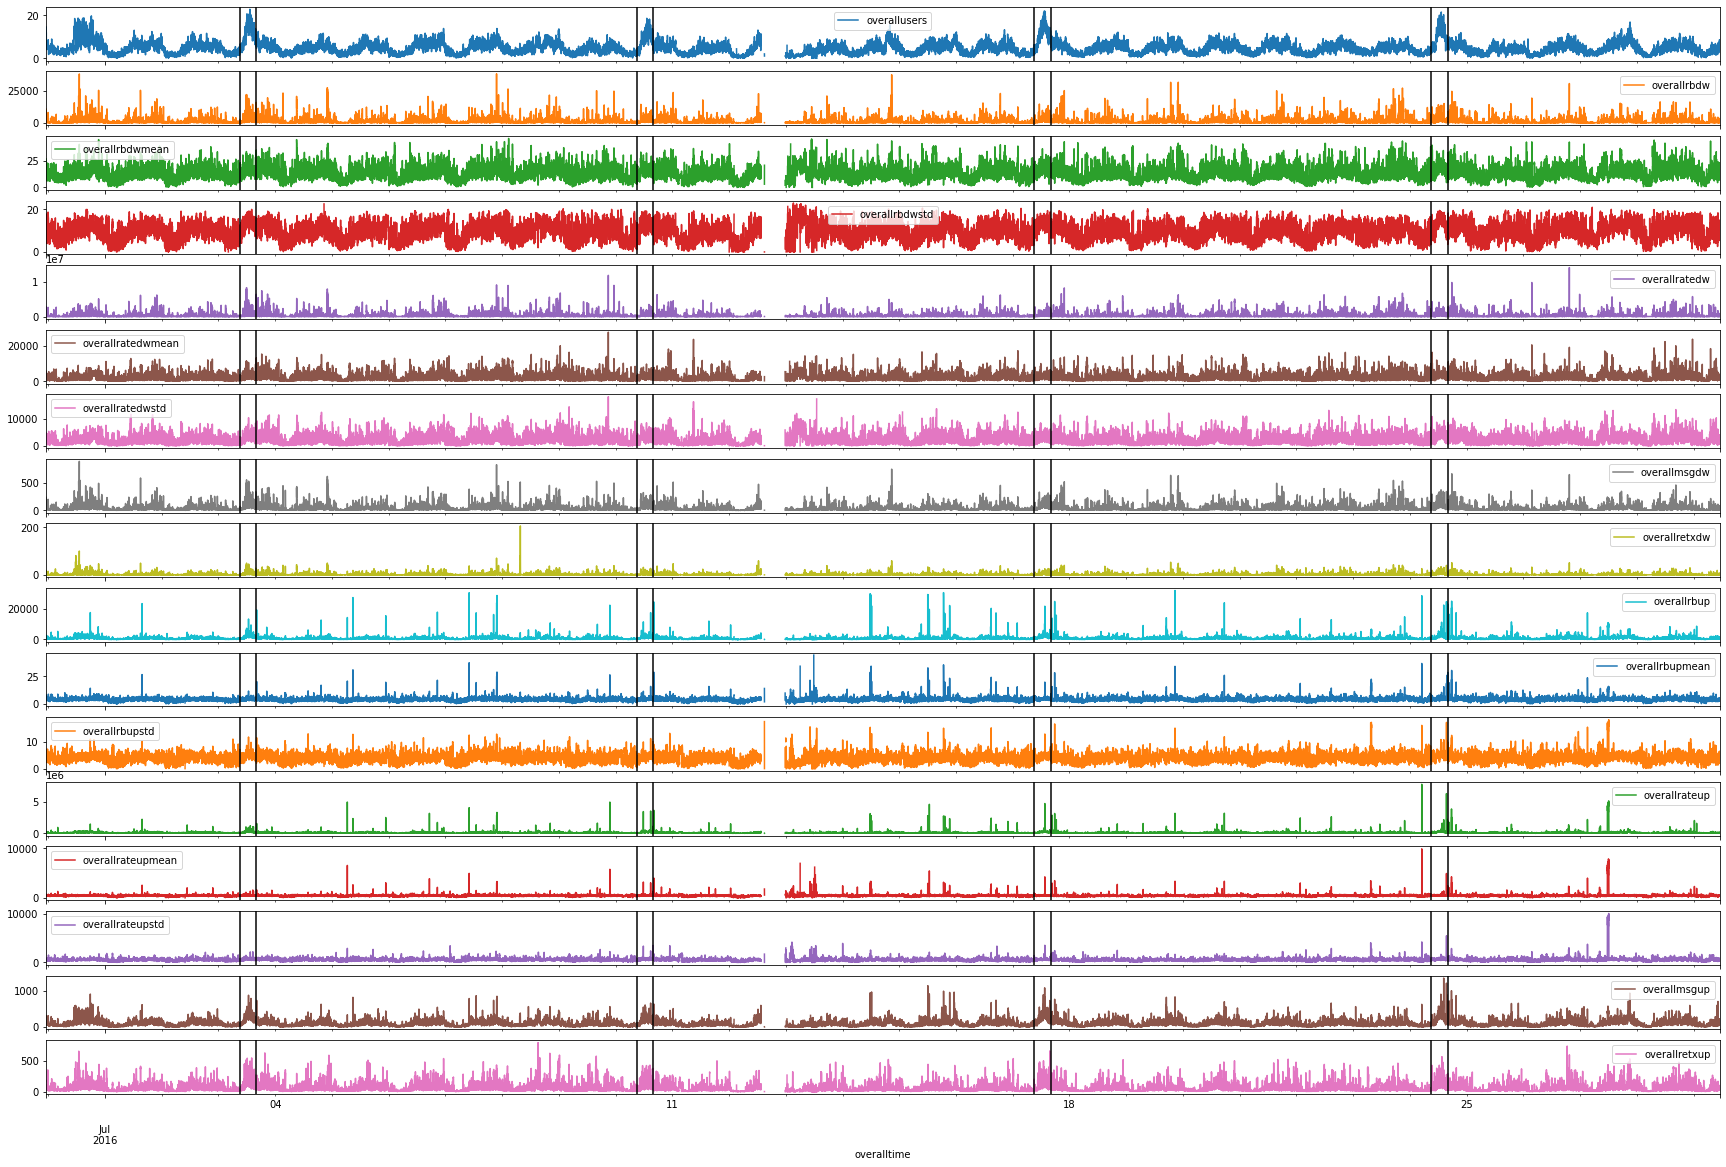

In [11]:
axs = df_res.plot(subplots=True, sharex=True, figsize=(30,20))
for t in market:
    for ax in axs:
        ax.axvline(t, color="black", ls="-")
plt.show()

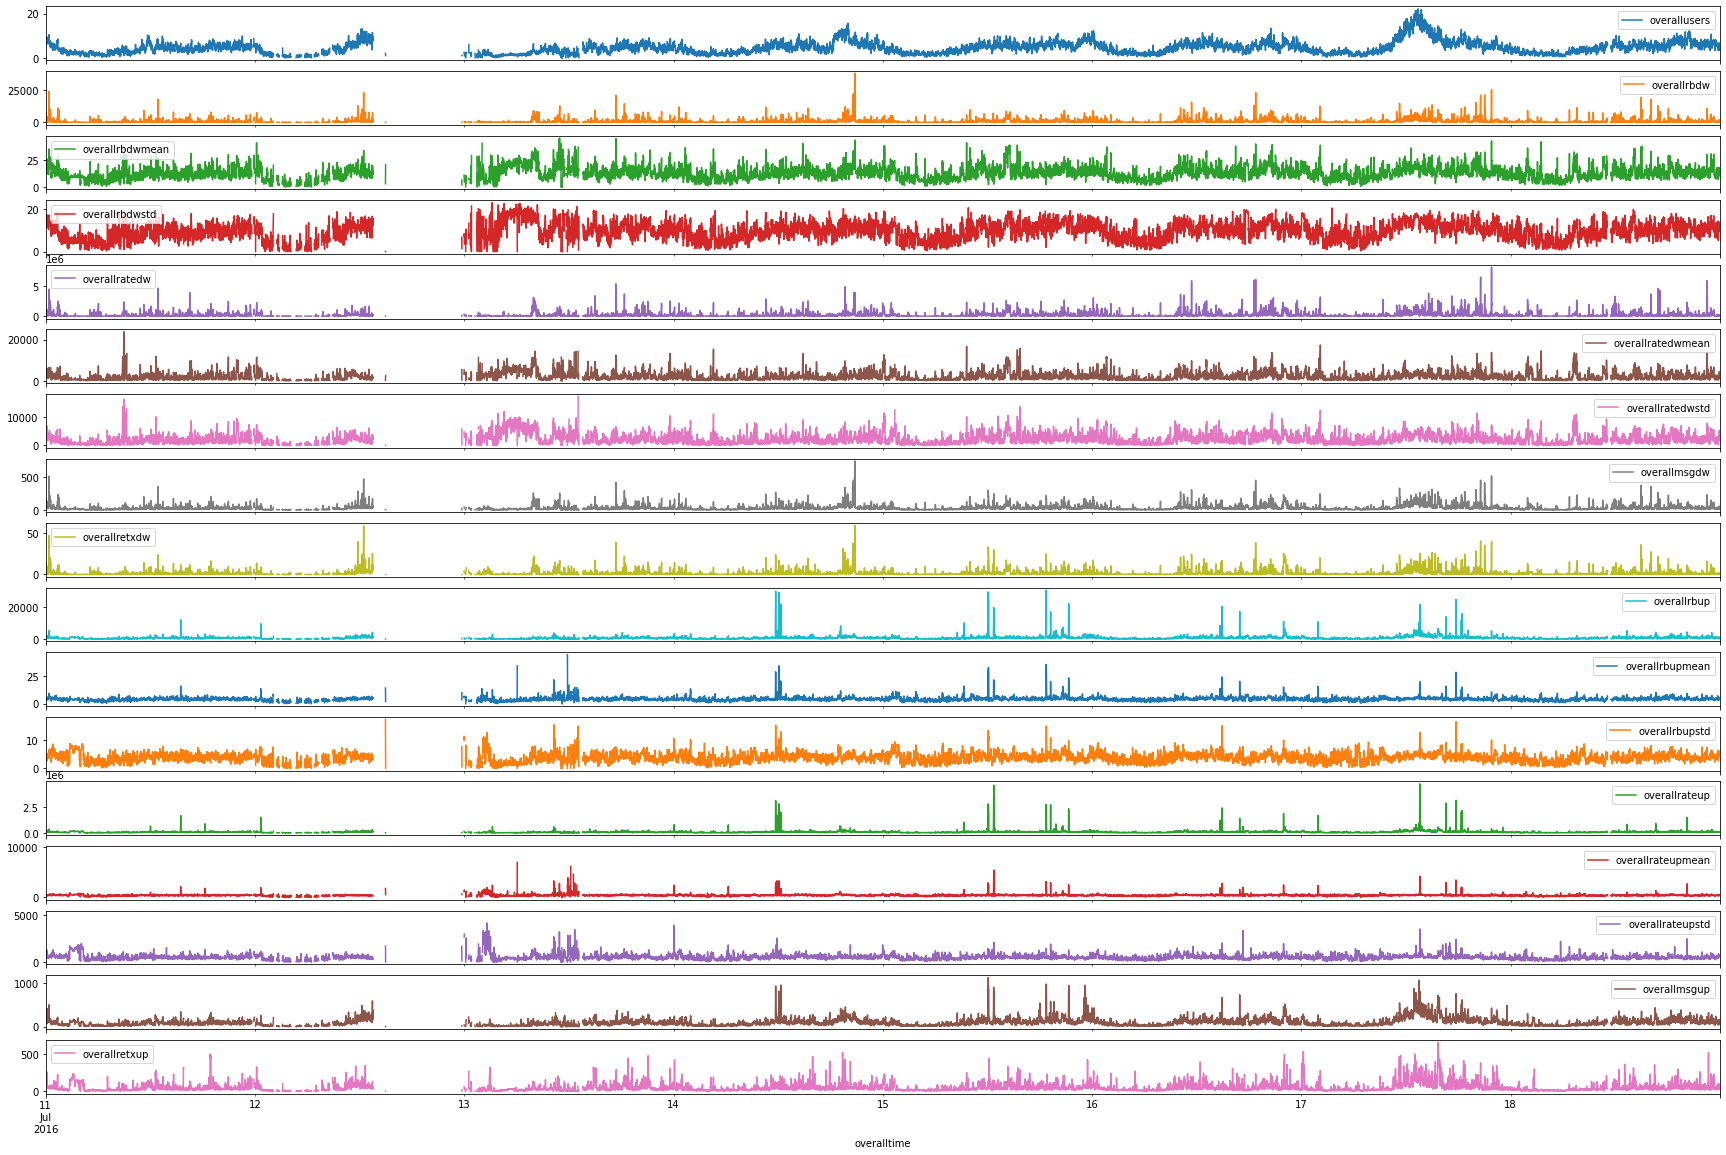

In [12]:
_ = df_res.loc["2016-07-11":"2016-07-18"].plot(subplots=True, sharex=True, figsize=(30,20))

In [13]:
df_res.to_csv("data/rastro_1min.tar.gz", index=True)

In [14]:
df_nan.to_csv("data/rastro_nan_1min.tar.gz", index=True)

In [15]:
corr = df_res.corr()

<AxesSubplot:>

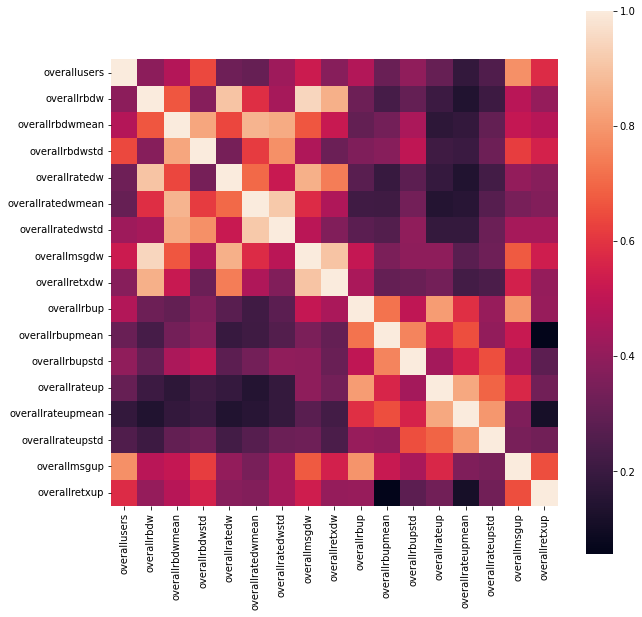

In [16]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax =ax, square=True)